In [1]:
import numpy as np
from random import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Lets define the Lambda Array in terms of Minutes
l_t=np.zeros(1440)
l_t[0:360]=[0.2 for i in range(360)]
l_t[360:480]=[0.9 for i in range(120)]
l_t[480:720]=[0.5 for i in range(240)]
l_t[720:900]=[0.6 for i in range(180)]
l_t[900:1020]=[1 for i in range(120)]
l_t[1020:1140]=[0.6 for i in range(120)]
l_t[1140:1440]=[0.5 for i in range(300)]

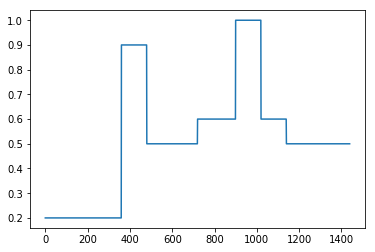

In [25]:
#Visualizing the Lambda
plt.plot(l_t)
plt.show()

In [30]:
# Need to use a thinning algorithm 
def thinnin():
    t =0
    arrival=[]
    #Upper Limit
    while t<=1440:
        u1 = rand()
        #changing to it exponential
        delta_t = np.exp(u1)
        # Increment the time 
        t+=delta_t
        #if it is above a day we dont care
        if t>1440:
            break
        u2 = rand()
        prob = l_t[int(t)]
        if u2<=prob:
            #Keep appending arrival of cars
            arrival.append(t)
            
    return arrival

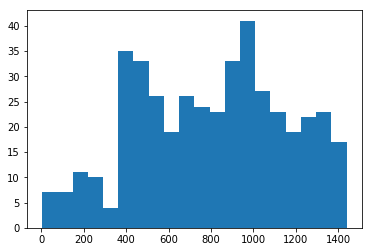

In [32]:
arrival_1=thinnin()
plt.hist(arrival_1,bins=20)
plt.show()

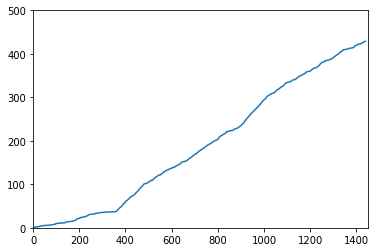

430


In [33]:
#Plotting for 1 trial
ax = plt.plot(arrival_1)
plt.xlim([0,1450])
plt.ylim([0,500])
x_new = ax[0].get_ydata()
y_new = ax[0].get_xdata()
ax[0].set_xdata(x_new)
ax[0].set_ydata(y_new)
plt.show()
print(len(arrival_1))

In [34]:
arrival_data =[]
# of Trials is 150
for _ in range(150):
    arrival_data.append(thinnin())

#Function which gets us the Cummalative count of cars at each index, Where the index represents the minute
#We will have 150 rows for 150 trials
CumCount = [
        [np.argwhere(x<=t)[-1,0]+1 for t in np.arange(int(x[0])+1,1440,1)] 
        for x in arrival_data 
       ]
# We need to take care of the arrival of the Car, 
#and we do this by using a Temp array(Basically Pad on both the sides, so that we do the proper mean)
Temp=[]
for i in CumCount:
    Temp.append(np.pad(i,(1440-len(i),0),'constant'))
New_CumCount = np.array(Temp)
Mean_Count=np.mean(New_CumCount,axis=0)

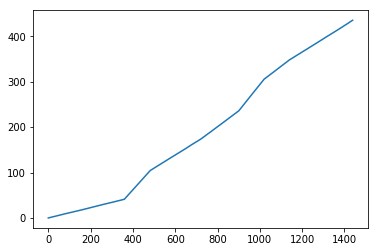

In [35]:
plt.plot(Mean_Count)